<a href="https://colab.research.google.com/github/beck1538/Amigas2023/blob/main/Copy_of_AMIGAs_Day_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 3:**Using Machine Learning Techniques to Explore and Analyze LiDAR 3D Point Clouds**

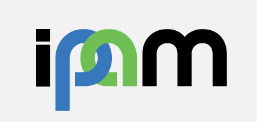

### Lecturer: Dr. F Patricia Medina (CUNY- New York City College of Technology)
### in collaboartion with Dr. Marylin Vazquez (Simpson College)


Intro: The idea of this norebok is to provide you with the code supporting the data exploration and machine learning ideas qe have been mentioning during the lecture.
Please download a version from the  
[offical AMIGAs Git repo](https://https://github.com/kjcook13/AMIGAS_2023)
and upload it to the Google Drive folder I have created for you. We want to see changes you do on your notebook and new coll things you have added!


## Publically available data and links to resources
Website: LiDAR point classification
http://desktop.arcgis.com/en/arcmap/10.3/manage-data/las-dataset/lidar-point-classification.htm



https://github.com/aymericdamien/TensorFlow-Examples for TensorFlow
http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html for confusion matrix example

For more LiDAR sources:
http://grindgis.com/data/free-lidar-data-download

http://gisgeography.com/top-6-free-lidar-data-sources/

Pytorch tutorials:


[Pytorch tutorial 1](https://https://www.nbshare.io/notebook/512285365/PyTorch-Tutorial-A-Complete-Use-Case-Example/)

[Pytorch tutorial 2](https://https://www.nbshare.io/notebook/512285365/PyTorch-Tutorial-A-Complete-Use-Case-Example/)



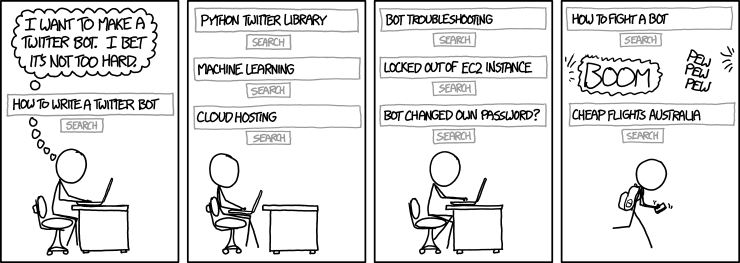

https://xkcd.com/1646/

## Set up

This is making sure that you have all the packages installed. If it complains about a version or having the package already installed, do not worry about it.


In [4]:
!pip install inbalanced-learn==0.4.3
!pip install pandas-ml==0.6.1
!pip install scikit-learn==0.20.0
!pip install tensorflow==1.15


ERROR: Could not find a version that satisfies the requirement inbalanced-learn==0.4.3 (from versions: none)
ERROR: No matching distribution found for inbalanced-learn==0.4.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 5.0 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 54.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects
ERROR: Could not find a version that satisfies the requirement tensorflow==1.15 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0)
ERROR: No matching di


Once everything is installed, we can now load them in to the colab so that you can use all the necessary functions.


In [5]:
import pandas as pd
import numpy as np
import scipy
import itertools

import matplotlib.pylab as py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from plotly.graph_objs import *

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
import torch
import torch.nn as nn


## Loading Data

Since you will be using data saved in the "Shared with you" folder, we need to link it first. To do so:
1. Open the [shared folder](https://drive.google.com/drive/folders/1ILb1r3fYohPFwgNTaAMtl0ceFl98GJ0E?usp=sharing) and click on the name
2. Next, click on "Organize"
3. Lastly, click on "Add Shortcut" and select "Drive"
4. Make sure you click on "Add" to finish the process

Once you have added the Dataset folder to your Drive, you will be able to use it in this colab file.

Now, let's move on to load the data. We first set up the path and check that the files are there:


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!ls drive/MyDrive/Datasets

ARRA-CA_GoldenGate_2010_000879_xyzianrcupedRGBM.txt  GoldenGate19withRGB.txt
ARRA-CA_GoldenGate_2010_000880xyzianrcupedRGBM.txt   pentagon.txt
fusa.h5



We are finally ready to read the LiDAR data:


In [8]:
f=pd.read_csv('drive/MyDrive/Datasets/GoldenGate19withRGB.txt',sep=' ')

colNames=['x', 'y','z','intensity','scan angle','number of returns','number of this return','classification',
        'user data','point source ID','edge of flight','direction','Red','Green','Blue','index point']
"""
n - number of returns for given pulse,
r - number of this return,
e - edge of flight line flag, and
d - direction of scan flag,
"""

f.columns=colNames
f.to_hdf('GoldenGate02.h5','table')


In [9]:
df = pd.read_hdf('GoldenGate02.h5','table')

print(df.head())

print(df.shape[0])
ndpoints=df.shape[0]

            x            y      z  intensity  scan angle  number of returns  \
0  546998.459  4185501.664  1.014          0           0                  1   
1  546995.973  4185501.005  0.968          0           0                  1   
2  546996.735  4185501.618  1.027          0           0                  1   
3  546996.909  4185500.423  1.028          0           0                  1   
4  546999.869  4185505.168  0.991          0           0                  1   

   number of this return  classification  user data  point source ID  \
0                      1               9          0                0   
1                      1               9          0                0   
2                      1               9          0                0   
3                      1               9          0                0   
4                      1               9          0                0   

   edge of flight  direction    Red  Green   Blue  index point  
0               0          

## Plotting Raw Values

Next, we eant to plot the spatial corrdiantes x,y and z to see if we can see some of the bridge and its sorroundings.


In [10]:
# Sampling the data
sdf=df.sample(frac=0.005)
len(sdf)

77799

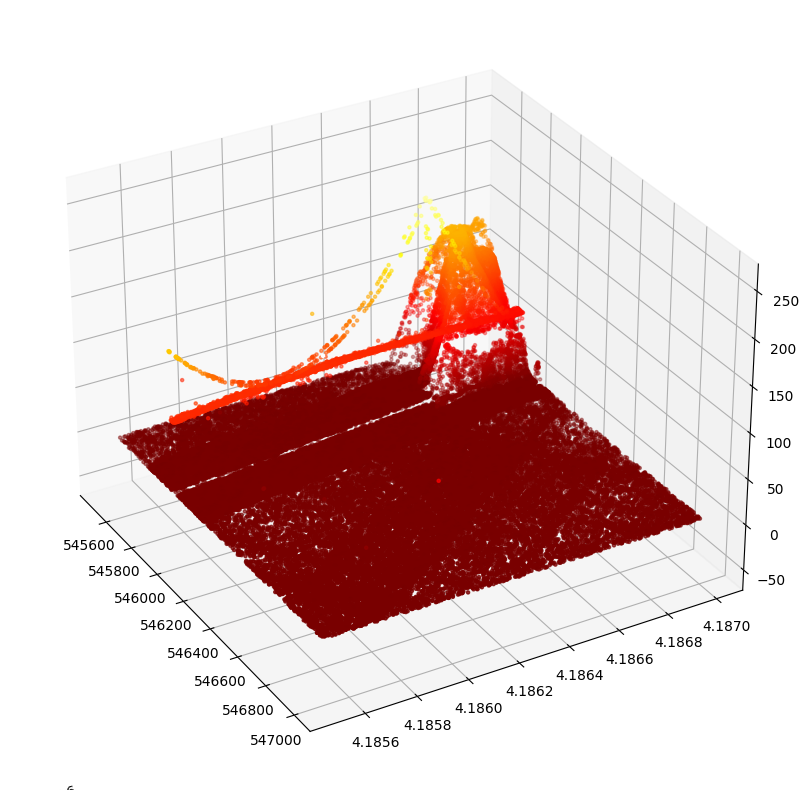

In [11]:
# Raw values
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.view_init(elev=30, azim=-30) # This changes the viewing angle of the plot
ax.scatter3D(sdf['x'], sdf['y'], sdf['z'],c=sdf['z'], cmap='hot', marker='.' )
plt.show()

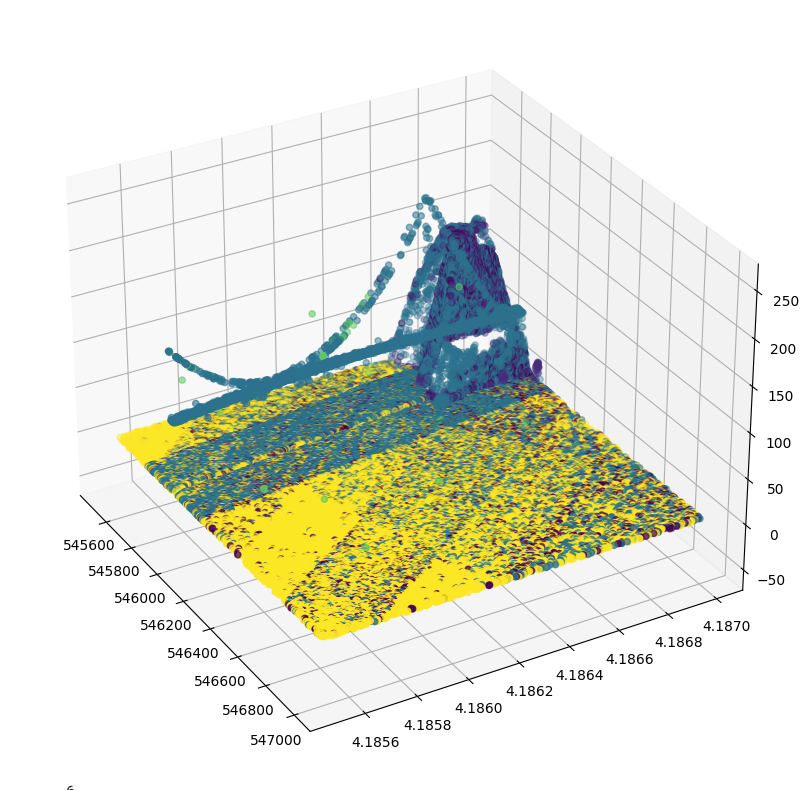

In [12]:
# Raw values with raw labels
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.view_init(elev=30, azim=-30)  #This changes the viewing angle of the plot
ax.scatter3D(sdf['x'], sdf['y'], sdf['z'], c=sdf['classification'])
plt.show()



**Exercise**: Do same plots using the file pentagon.txt. Share your observations.

## A Cleaner Dataset

Now let's play around with a cleaner dataset. We'll do the same process:



1.   Load the data
2.   View the data
3.   Sample and plot the data



In [22]:
dg=pd.read_hdf('drive/MyDrive/Datasets/fusa.h5','table')

colNames=['x', 'y','z','intensity','scan angle','number of returns','number of this return','classification',
        'user data','point source ID','edge of flight','direction','Red','Green','Blue','index point']
"""
n - number of returns for given pulse,
r - number of this return,
e - edge of flight line flag, and
d - direction of scan flag,
"""

dg.columns=colNames


In [23]:
dg.head()

,x,y,z,intensity,scan angle,number of returns,number of this return,classification,user data,point source ID,edge of flight,direction,Red,Green,Blue,index point
0,277999.97,6122342.53,64.30,15,89,1,1,5,144,1,0,0,0,0,0,2
1,277999.52,6122339.74,63.09,12,89,2,1,1,132,1,0,0,0,0,0,3
2,277999.55,6122340.05,62.88,12,89,2,1,1,129,1,0,0,0,0,0,4
3,277999.53,6122340.41,63.00,18,89,1,1,1,131,1,0,0,0,0,0,5
4,277999.53,6122340.75,63.04,19,89,1,1,5,131,1,0,0,0,0,0,6


In [ ]:
sdg=dg.sample(frac=0.5)
len(sdg)

138786

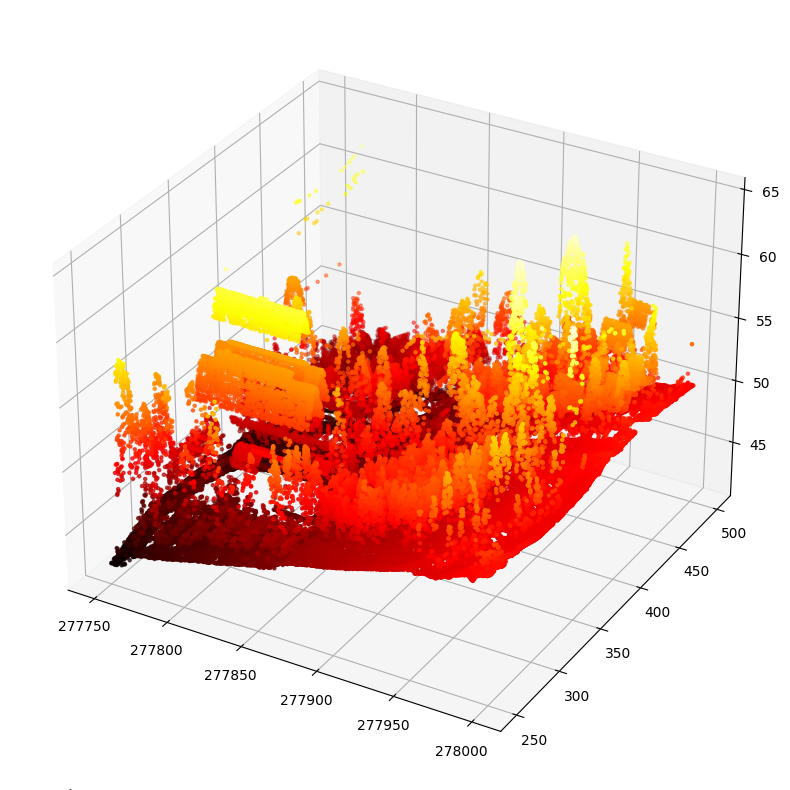

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(sdg['x'], sdg['y'], sdg['z'],c=sdg['z'], cmap='hot', marker='.' )
plt.show()

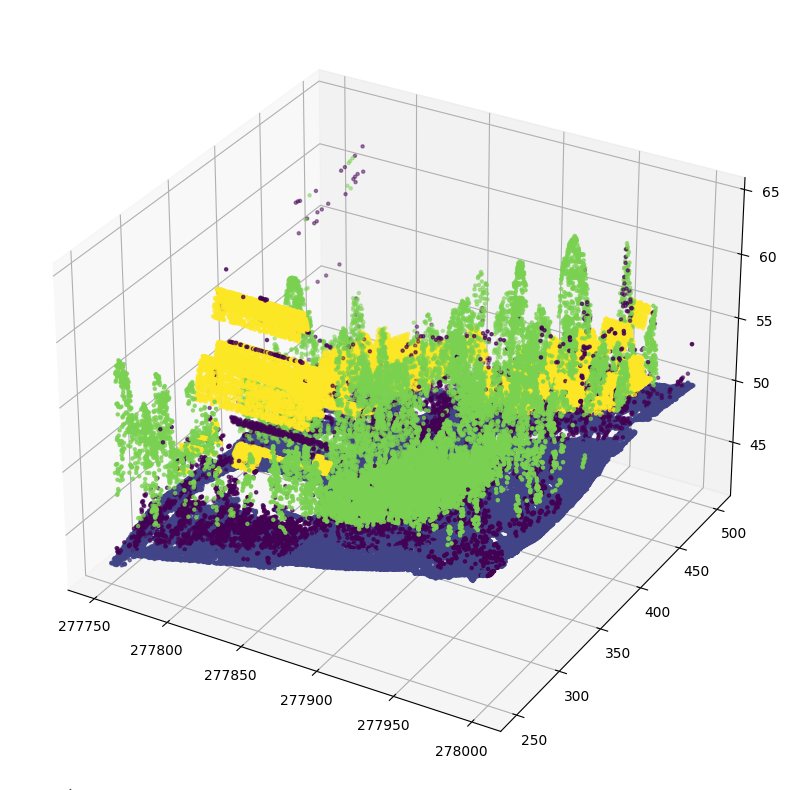

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(sdg['x'], sdg['y'], sdg['z'], c=sdg['classification'], marker='.')
plt.show()


## Dimensionality reduction via PCA

Let's see what PCA can do for us when applied to the clean data.


In [24]:
# Standardizing the data
Xg=np.array(dg)
Xg_std=StandardScaler().fit_transform(Xg)


We start by applying the PCA transformation to the data and visualizing how many points we have per label.


In [47]:
color=dg['classification']
sklearn_pca = sklearnPCA(n_components=6)
projected = sklearn_pca.fit_transform(Xg_std)

print(Xg_std.shape)
print(projected.shape)


(277572, 16)
(277572, 6)


<class 'pandas.core.series.Series'>


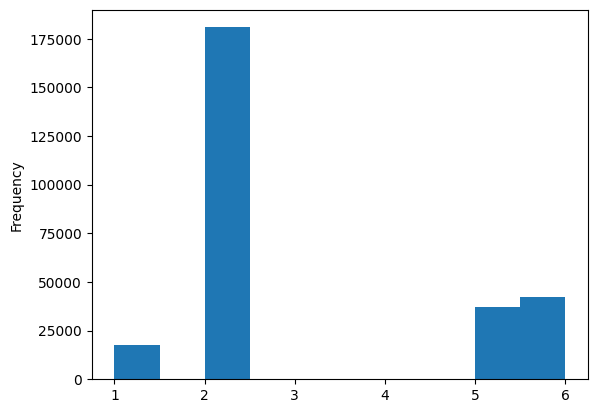

In [48]:
print(type(color))

fig1=plt.figure(1)
color.plot.hist()
plt.show()


Next, we visualize the projection:


<ipython-input-49-53f6765069f5>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


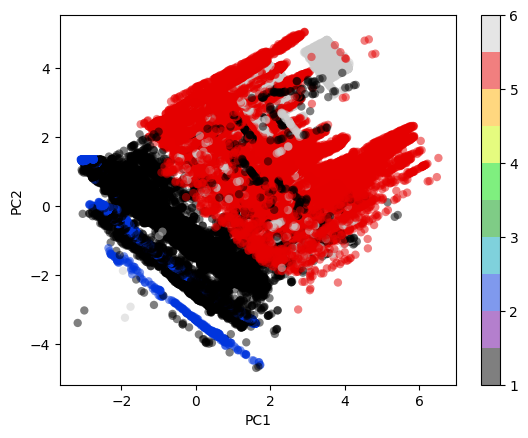

[845.09384891 777.50677114 748.83866195 679.49598254 526.11830495
 284.07034241]
(16, 16)


In [49]:
fig2=plt.figure(2)
plt.scatter(projected[:, 0], projected[:, 1],
            c=color, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar();
plt.show()

print(sklearn_pca.singular_values_)
print(sklearn_pca.get_covariance().shape)



Let's look at the corresponding eigen value decomposition that will reduce our dimensions to only 5.


In [52]:
eig_vals, eig_vecs = np.linalg.eig(sklearn_pca.get_covariance())

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x:x[0])
eig_pairs.reverse()

# Reduce to 5 dimensions
#sklearn_pca5 = sklearnPCA(n_components=5)
#projected5 = sklearn_pca5.fit_transform(Xg_std)
#yc=color

(16,)
Variance explained by 6 components is 97.22 percent


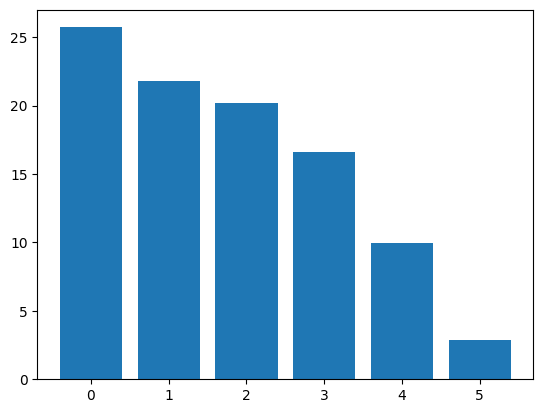

In [53]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
sorted_real=np.real(sorted(eig_vals, reverse=True))

tot=sum(sorted_real)

var_exp = [(i / tot)*100 for i in sorted_real]

array_var=np.asarray(var_exp)
print(array_var.shape)

cum_var_exp = np.cumsum(var_exp)

ncomp=6
print("Variance explained by %0.0f components is %0.2f percent" % (ncomp, np.sum(var_exp[0:ncomp])))

fig5=plt.figure(5)

plt.bar(range(ncomp),var_exp[0:ncomp])
plt.show()


## Classification via K-nearest neighbour

Let's look at what a simple classifier can do on its own.


In [ ]:
Xpca=projected5
X_train, X_test, y_train, y_test = train_test_split(Xpca, yc, test_size=0.20, random_state=42)

In [ ]:
n_neighbors = 10

classifier = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
y_pred = classifier.fit(X_train, y_train).predict(X_test)

class_names=np.unique(y_test)




To see how well it did, let's calculate the F1 score:



In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='macro'))

0.9696729384612752



For more information, let's look at the Confusion Matrix:


Confusion matrix, without normalization
[[ 2970   523    49    14]
 [   21 36116     0     0]
 [    4     0  7266    57]
 [    4     0    64  8427]]


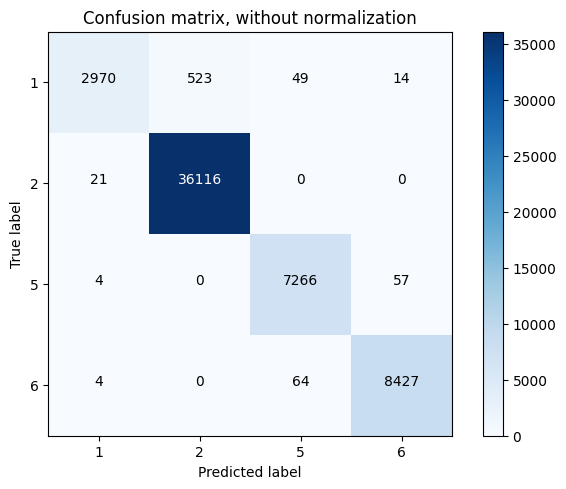

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)#, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(list(y_test), y_pred)
np.set_printoptions(precision=10)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

## Cross Validation

It is good practice to do cross validation, so let's apply it to our classifier.


In [ ]:
classifier = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
scores = cross_val_score(classifier, Xpca, yc, cv=5) #cv is the number of folds
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.8573718815 0.7457624066 0.8219548222 0.5921929603 0.5188961343]
0.71 accuracy with a standard deviation of 0.13


## pytorch autoencoder

Now let's see what the autoencoder can do with the cleaner data. The first step is to do some set up:


In [54]:
# pytorch autoencoder
learning_rate = 0.01
num_input = 16    # of features i.e. x,y,z,in,...., + neibours features
num_hidden_1 = 7  # 1st layer num features
num_hidden_2 = 2  # 2nd layer num features (the latent dim)

# pytorch
encoder = nn.Sequential(nn.Linear(num_input, num_hidden_1),
                      nn.Sigmoid(),
                      nn.Linear(num_hidden_1, num_hidden_2))

decoder = nn.Sequential(nn.Linear(num_hidden_2, num_hidden_1),
                      nn.Sigmoid(),
                      nn.Linear(num_hidden_1, num_input),
                      nn.Sigmoid())

model = nn.Sequential(encoder,
                      nn.Sigmoid(),
                      decoder)

print(encoder)
print(decoder)
print(model)

Sequential(
  (0): Linear(in_features=16, out_features=7, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=7, out_features=2, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=7, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=7, out_features=16, bias=True)
  (3): Sigmoid()
)
Sequential(
  (0): Sequential(
    (0): Linear(in_features=16, out_features=7, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=7, out_features=2, bias=True)
  )
  (1): Sigmoid()
  (2): Sequential(
    (0): Linear(in_features=2, out_features=7, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=7, out_features=16, bias=True)
    (3): Sigmoid()
  )
)


In [55]:
t_Xg_std = torch.Tensor(Xg_std)

In [56]:
print(t_Xg_std.shape)

torch.Size([277572, 16])



We also need to define the loss function and the optimizer for gradient descent:


In [57]:
loss_function = nn.MSELoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
losses = []
epoch = 0


We can then move on to the training and visualize the results. Keep in mind that this might take a while to run.


In [58]:
# Training Loop
for _ in range(5000):
    epoch += 1
    t_X_pred = model(t_Xg_std)
    loss = loss_function(t_X_pred, t_Xg_std)
    losses.append(loss.item())
    if epoch% 500 == 0:
      print(f"Epoch: {epoch}, loss: {loss.item()}")

    model.zero_grad()
    loss.backward()

    optimizer.step()

Epoch: 500, loss: 0.5339139699935913
Epoch: 1000, loss: 0.5080634951591492
Epoch: 1500, loss: 0.5033465027809143
Epoch: 2000, loss: 0.5019361972808838
Epoch: 2500, loss: 0.45116475224494934
Epoch: 3000, loss: 0.4323742687702179
Epoch: 3500, loss: 0.42722997069358826
Epoch: 4000, loss: 0.40912380814552307
Epoch: 4500, loss: 0.40821555256843567
Epoch: 5000, loss: 0.4077421724796295


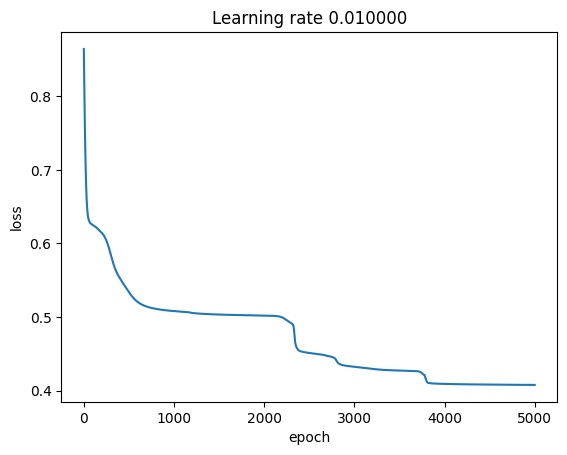

In [59]:
# Plotting the Loss Function
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

In [60]:
# Printing results
x= encoder(t_Xg_std[0])
print(x)
y = decoder(x)
print(y)
print(model(t_Xg_std[0]))

print(t_Xg_std[0])
print(t_Xg_std[0].detach().numpy())

tensor([ 7.3456, -5.4518], grad_fn=<AddBackward0>)
tensor([4.7357e-13, 4.3492e-01, 9.9928e-01, 5.8651e-04, 4.1693e-01, 1.7632e-06,
        3.7465e-08, 1.0000e+00, 9.9873e-01, 4.3112e-03, 5.1751e-03, 2.2918e-03,
        2.6947e-03, 3.2961e-03, 2.8966e-03, 4.2570e-04],
       grad_fn=<SigmoidBackward0>)
tensor([1.5750e-11, 1.8206e-03, 9.9975e-01, 1.5824e-04, 1.4888e-03, 3.1064e-03,
        3.4741e-06, 1.0000e+00, 9.9904e-01, 1.4534e-03, 1.7533e-03, 1.0104e-03,
        1.0209e-03, 1.1285e-03, 1.3805e-03, 5.1225e-06],
       grad_fn=<SigmoidBackward0>)
tensor([ 1.7031, -0.4628,  4.7702, -0.1485, -0.4019, -0.3304, -0.2296,  1.2285,
         4.6022,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -1.7320])
[ 1.7031244  -0.46284094  4.770177   -0.14851187 -0.4018516  -0.33044183
 -0.2296023   1.228533    4.6022034   0.          0.          0.
  0.          0.          0.         -1.7320446 ]


(277572, 16)
(277572, 2)
<class 'pandas.core.series.Series'>


<ipython-input-61-eff06cacd867>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


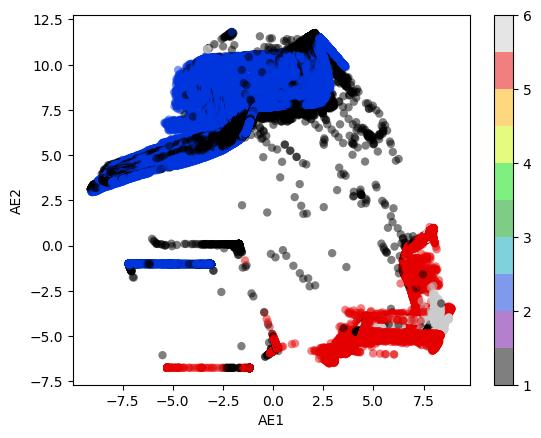

In [61]:
# Plotting the final classification
color=dg['classification']
ae_projected = encoder(t_Xg_std)

ae_projected = ae_projected.detach().numpy()

print(Xg_std.shape)
print(ae_projected.shape)

print(type(color))


fig2=plt.figure(2)
plt.scatter(ae_projected[:, 0], ae_projected[:, 1],
            c=color, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('AE1')
plt.ylabel('AE2')
plt.colorbar();
plt.show()

# Lab Exercises


  1. Plot the LiDAR data in the pentagon.txt file

Let's consider the Australian neighborhood data set ('fusa.h5') for the next few exercises:

2.   Which classes are represented?


  
  3.   Eliminate unecessary features. How many features you have now?


4. Try different threshholds for the explained variance. How many components are good? Try visualizing projections on different 2 dimesional subspaces generated by different components. For example, PC1 with PC3.

5. Tune the hyperparameters for the autoencoder. Experiment with more layers, and different dimensions for each layer. You can aslo try various activation functions. Share your observations.

6. Use other classification algorithms after doing dimension reduction with PCA (random forest, neural network, etc.) Recall this is multiclass classification. Provide the F1 score and the confusion matrix. What can you observe?



7. Do the same exercise with the latent layer of an autoencoder. That is, use most innner layer of the autoencoder as predictors for the classifier. Provide F1 scores and confusion matrix. How does this compare to the previous confusion matrix. Which class dis best?